In [14]:
import numpy as np

# Question 1.3
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]

def ff_nn_2_ReLu(x, params):
    W1,b1,W2,b2,W3,b3 = params
    h1 = relu(np.dot(x, W1) + b1)
    h2 = relu(np.dot(h1, W2) + b2)
    y_hat = softmax(np.dot(h2,W3) + b3)
    return y_hat
    

In [16]:
w1 = np.array([[1, -1, 0],[0,0,.5]]).reshape(2,3)
w2 = np.array([[1, 0, 0],[-1,-1,0]]).reshape(3,2)
w3 = np.array([[1, 0, -1],[1,0,-1]]).reshape(2,3)
b1 = np.array([0,0,1]).reshape(1,3)
b2 = np.array([1,-1]).reshape(1,2)
b3 = np.array([1,0,0]).reshape(1,3)


x = np.array([[1,-1],[0,-1],[0,1]]).reshape((3,2))

print(ff_nn_2_ReLu(x, (w1,b1,w2,b2,w3,b3) ))

[[0.90875992 0.07459556 0.01664452]
 [0.73612472 0.16425163 0.09962365]
 [0.57611688 0.21194156 0.21194156]]


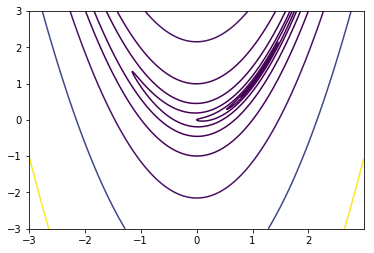

In [20]:
# Question 2.1
# derivative with respect to x: 
# 2 * (200*x^3 - 200 * x * y + x -1)

# derivative with respect to y:
# 200 * (y - x^2)


# Question 2.2 
import matplotlib.pyplot as plt

delta = 0.01
s = 2.5
x = np.arange(-3, 3, 0.01)
y = np.arange(-3, 3, 0.01)
X, Y = np.meshgrid(x, y)
rosenbrock = (1-X)**2 + 100*(Y - X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, rosenbrock, levels=np.logspace(start=-2,stop=4, num=10))
plt.show()


[[ 2.17056515 -3.83398441]
 [ 2.09634889 -3.81689373]
 [ 2.02746968 -3.80047059]
 [ 1.96329104 -3.78464838]
 [ 1.90328019 -3.76937006]
 [ 1.84698711 -3.75458637]
 [ 1.79402852 -3.74025447]
 [ 1.74407555 -3.72633689]
 [ 1.6968441  -3.71280061]
 [ 1.65208723 -3.69961645]
 [ 1.60958906 -3.68675843]]


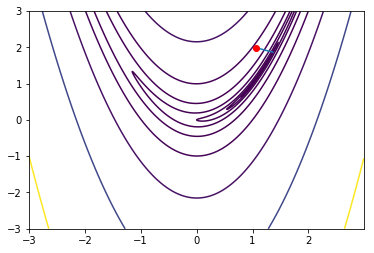

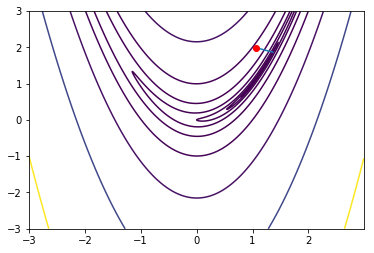

In [22]:
# Question 2.3
def grad_f(vec):
    x, y = vec
    df_dx = 2*(200*x**3 - 200*x*y + x - 1)
    df_dy = 200*(y - x**2)
    return np.array([df_dx, df_dy])

def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-4,4,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

np.random.seed(10)


print(grad_descent(learning_rate = 0.00001))


fig, ax = plt.subplots()
CS = ax.contour(X, Y, rosenbrock, levels=np.logspace(start=-2,stop=4, num=10))
trajectories = []
traj = grad_descent(iterations=50, learning_rate=1e-4)
trajectories.append(grad_descent(iterations=50, learning_rate=1e-4))
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-')
plt.plot(x[0],y[0],'ro')
plt.show()


In [128]:
# question 2.4
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

print(grad_descent_with_momentum(alpha= 0.0001, epsilon = 0.0001))

[[3.70719637 9.06786692]
 [3.01334426 9.16137568]
 [3.02265136 9.15976239]
 [3.02506985 9.15929541]
 [3.02566309 9.15913041]
 [3.02580182 9.15904052]
 [3.02582802 9.15896924]
 [3.02582638 9.15890255]
 [3.02581787 9.158837  ]
 [3.02580766 9.15877173]
 [3.02579703 9.15870653]]


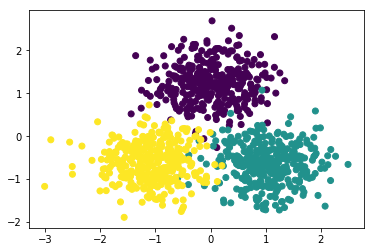

In [42]:
import pandas as pd


# question 3.1 
# let g be function of output activation
# gradient of loss function with respect to 
# v: product of: (y_hat - y), h2, derivative of g
# c: sum of y_hat - y, derivative of g
# w2: product of: (y_hat - y), v, derivative of ReLu of h2, h1, derivative of g
# b2: sum of product of: y_hat - y, v, derivative of ReLu of h2, derivative of g
# w1: product of: (y_hat - y), v, derivative of ReLu of h1, w2, derivative of ReLu, x, derivative of g
# b1: sum of product of: y_hat - y, v, derivative of ReLu of h1, h1, derivative of ReLu of h1, derivative of g


def initialize_params():
    w1 = np.random.randn(6).reshape(2,3)
    w2 = np.random.randn(6).reshape(3,2)
    w3 = np.random.randn(6).reshape(2,3)
    b1 = np.random.randn(3).reshape(1,3)
    b2 = np.random.randn(2).reshape(1,2)
    b3 = np.random.randn(3).reshape(1,3)
    return (w1, b1, w2, b2, w3, b3)

# question 3.2
def grad_f(param_vec, x, y):
    W1, b1, W2, b2, W3, b3 = param_vec
    a1 = x.dot(W1) + b1
    H1 = relu(a1)
    a2 = H1.dot(W2) + b2
    H2 = relu(a2)
    a3 = H2.dot(W3) + b3
    y_hat = softmax(a3)
    
    d_b3 = (y_hat - y).sum(axis=0)
    d_W3 = H2.T.dot(y_hat-y)   
    d_b2 = ((y_hat - y).dot(W3.T)*relu_derivative(a2)).sum(axis=0)
    d_W2 = H1.T.dot((y_hat - y).dot(W3.T)*relu_derivative(a2))   
    d_b1 = ((y_hat - y).dot(W3.T)*relu_derivative(a2)).dot(W2.T)* relu_derivative(a1).sum(axis=0)
    d_W1 = x.T.dot(((y_hat - y).dot(W3.T)*relu_derivative(a2)).dot(W2.T)* relu_derivative(a1)) 
    
    return (d_W1, d_b1, d_W2, d_b2, d_W3, d_b3)

def grad_descent(x, y, starting_point, iterations=10, learning_rate=1e-2):
    point = starting_point
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x, point))]
    
    updates = []
    for i in range(iterations):
        grads = grad_f(point, x, y)
        for j in range(len(grads)):
            updates.append(point[i] - learning_rate * grads[i])
            
        point = tuple(updates)
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x, point)))
    return (np.array(trajectory), losses)



# question 3.3
def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
            
        # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl


x, y, cl = gen_gmm_data()
plt.scatter(x[:,0], x[:,1], c=cl)
plt.show()

In [41]:
start = initialize_params()
traj, losses = grad_descent(x, y, starting_point=start, iterations=50,learning_rate=0.001)
plt.plot(losses)
plt.show()

ValueError: operands could not be broadcast together with shapes (99,3) (2,3) 